## Importing all Libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

## Loading the Data:

In [ ]:
df=pd.read_csv('heart.csv')
df.shape

(303, 14)

## Preprocessing, Analyzing, and Cleaning the Data:

In [ ]:
#Knowing More about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Checking for null values:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Since there are no missing values, we do not need any kind of imputation for this data.

In [ ]:
#Let us check for Duplicates:
df.duplicated().sum()

1

There is only one duplicate let us remove it:

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

There are no duplicates now!

In [ ]:
#Let us take a look into the statistical description of the data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# In the target column, 1 indicates that there is disease, therefore 0 indicates absence of disease:
df['target'].value_counts()


,count
target,
1,165
0,138


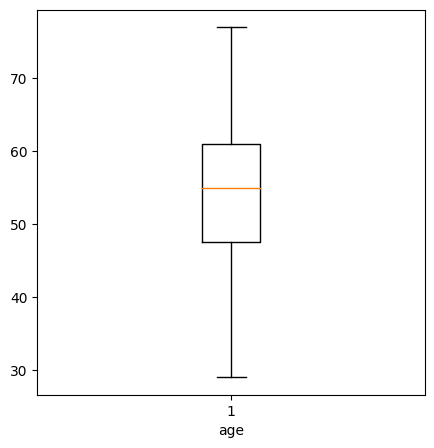

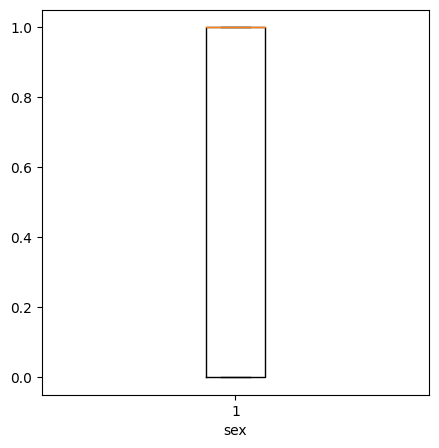

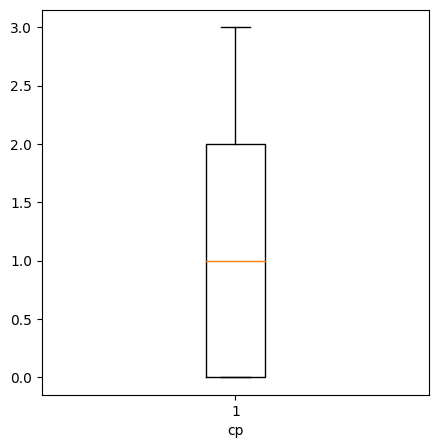

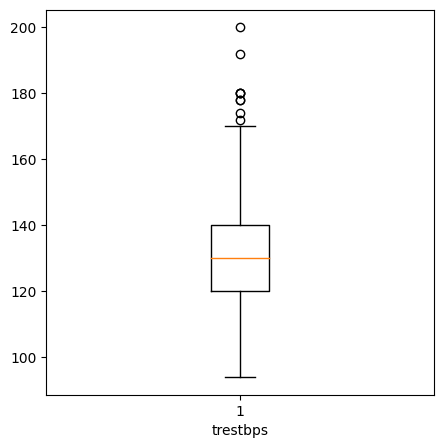

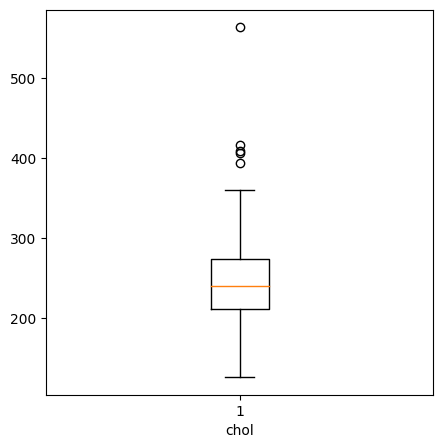

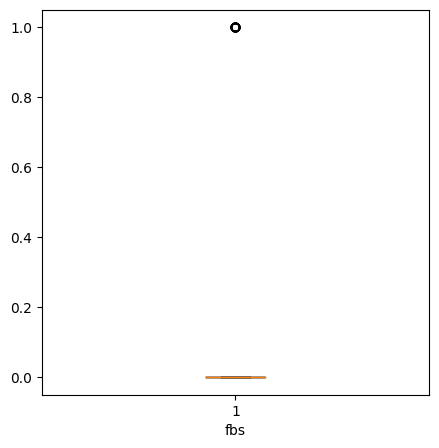

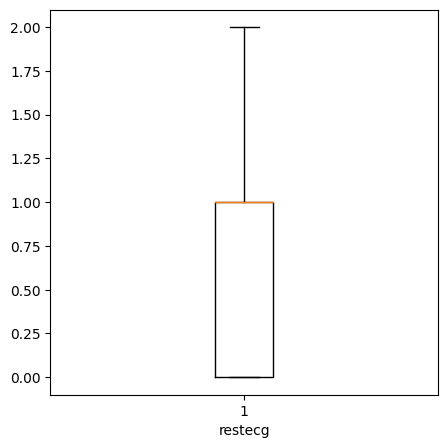

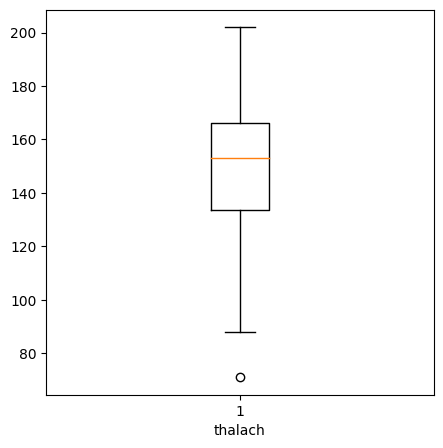

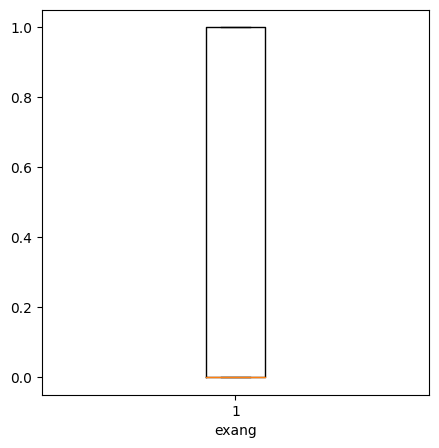

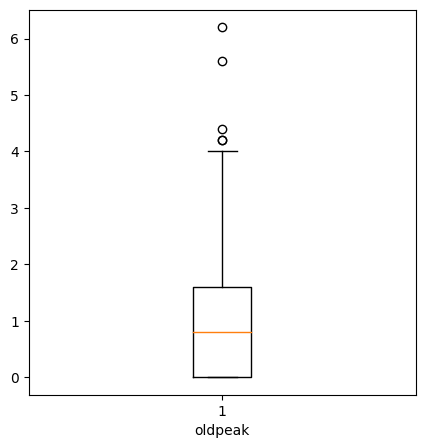

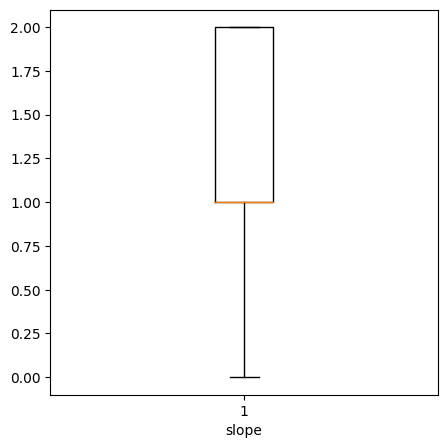

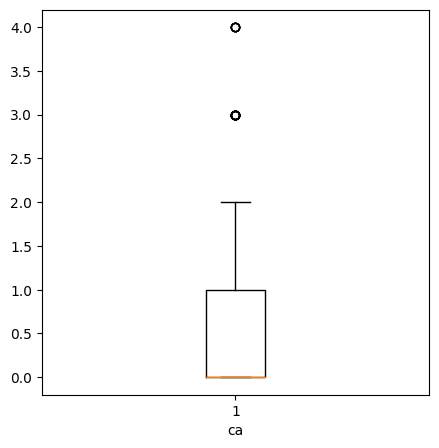

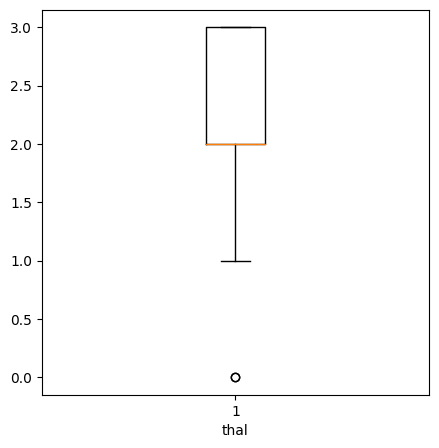

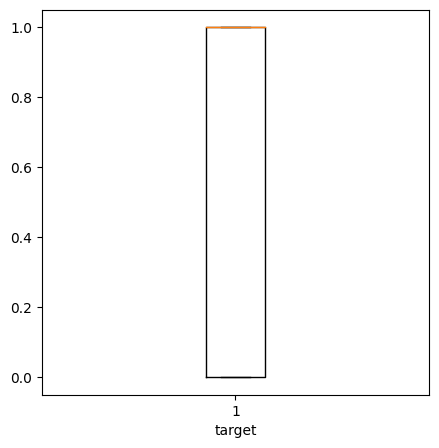

In [ ]:
#Discovering the outliers:
for i in df.columns:
  plt.figure(figsize=(5,5))
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

Apparently there are outliers for example in cholestrol or chol.

In [ ]:
#We will do this method to identify outliers using IQR:

def wisker_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound

# Let us remove the outliers:

In [ ]:
for i in ['ca','thal', 'oldpeak','chol','trestbps','thalach']:
    lower_bound, upper_bound = wisker_outliers(i)
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

## Now we should check if they are still there?

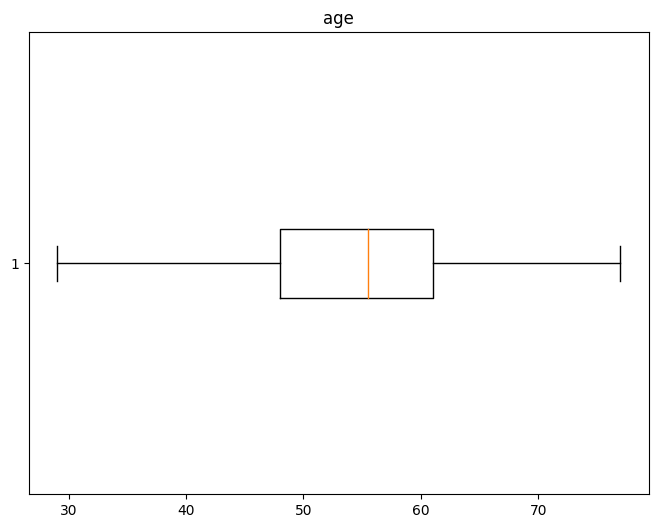

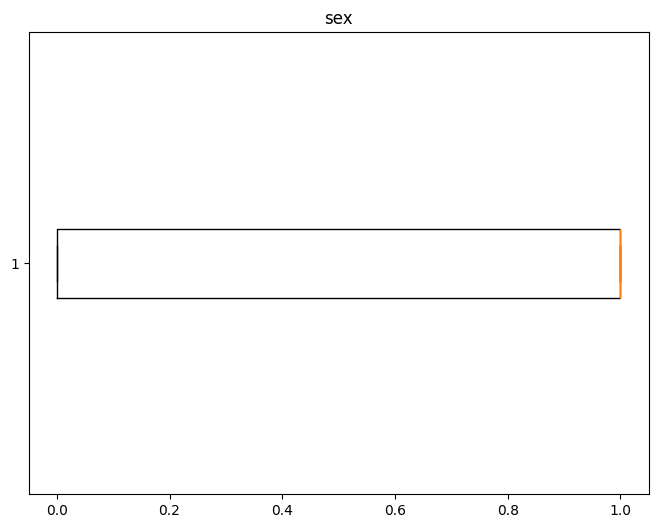

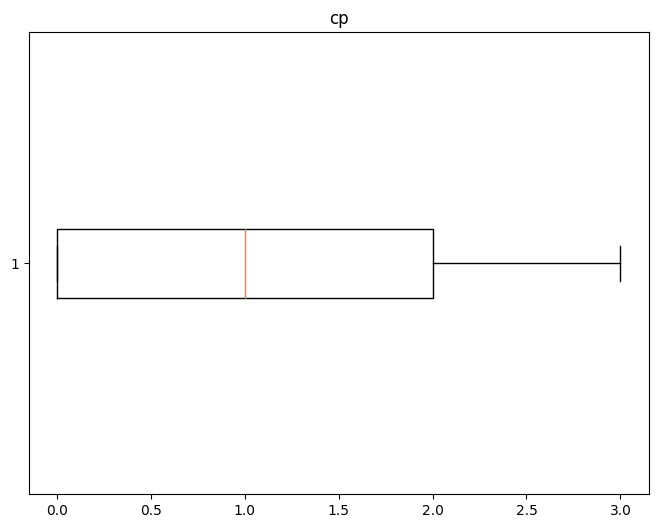

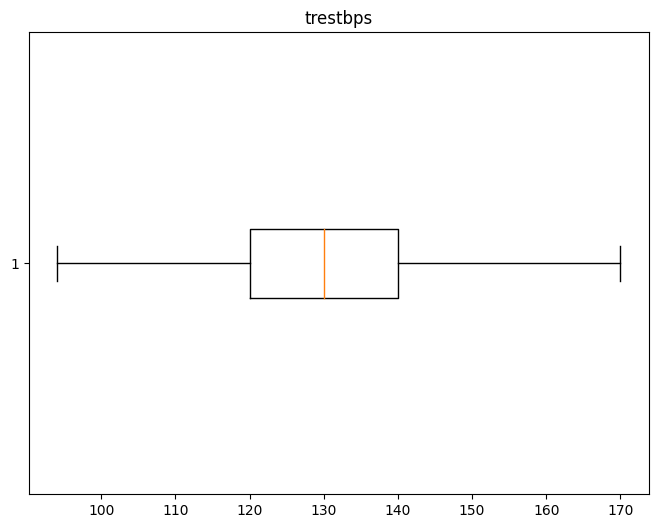

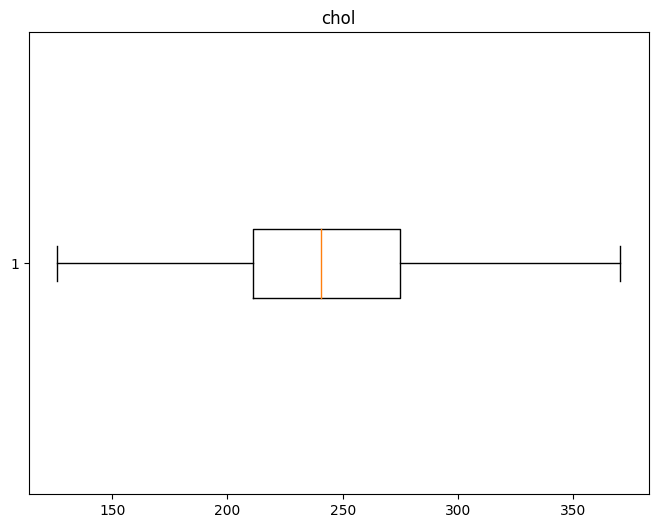

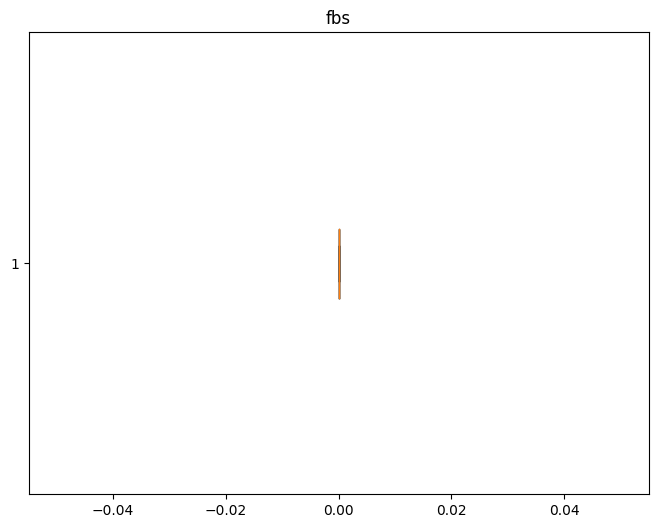

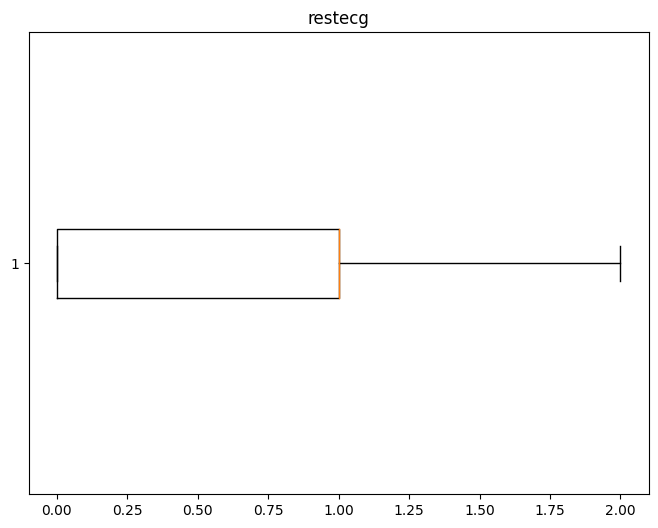

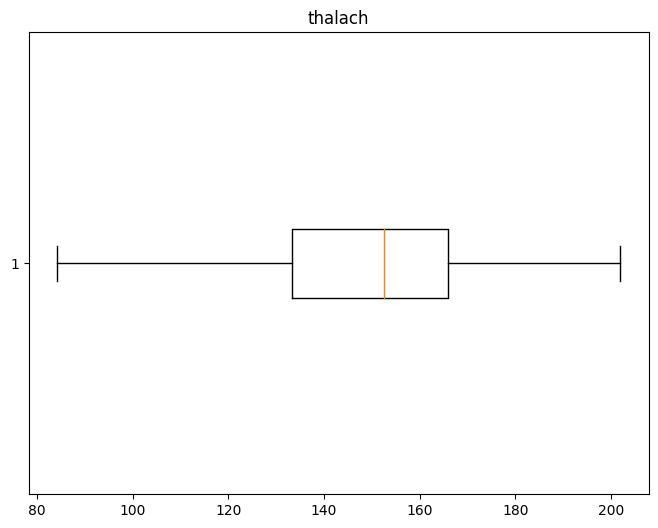

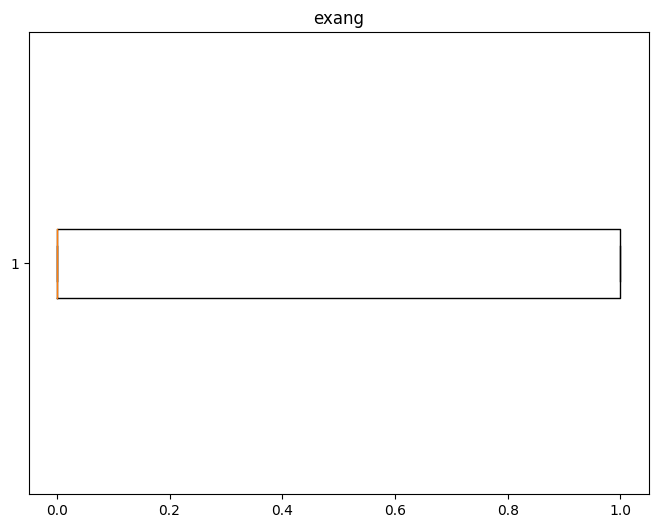

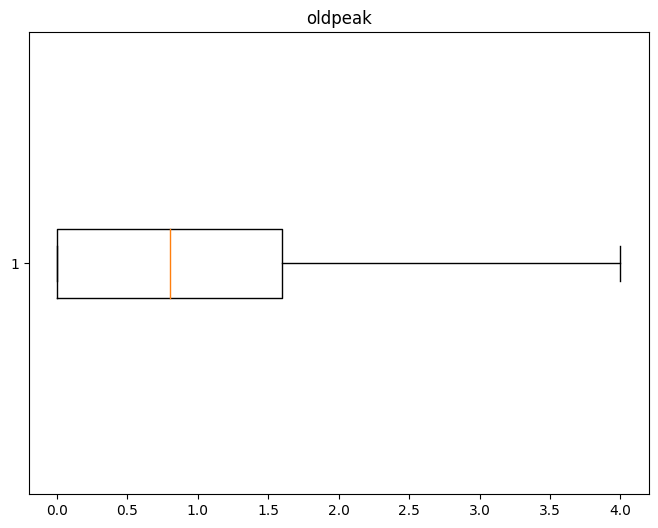

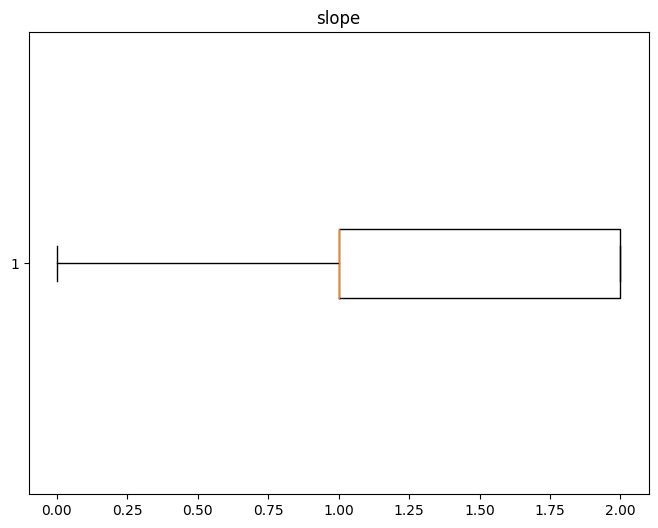

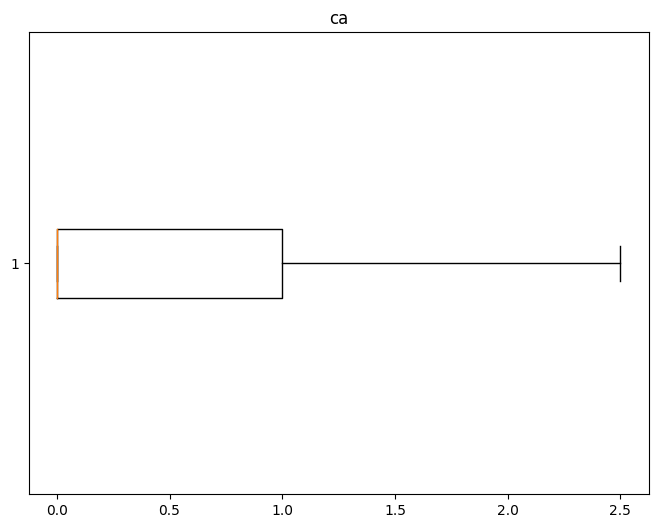

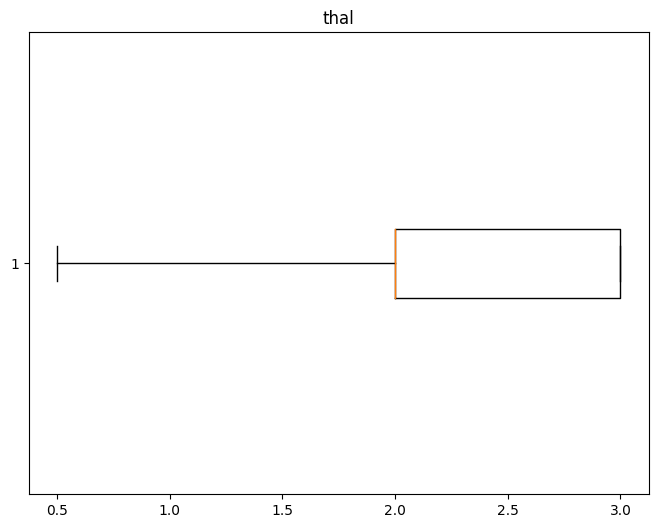

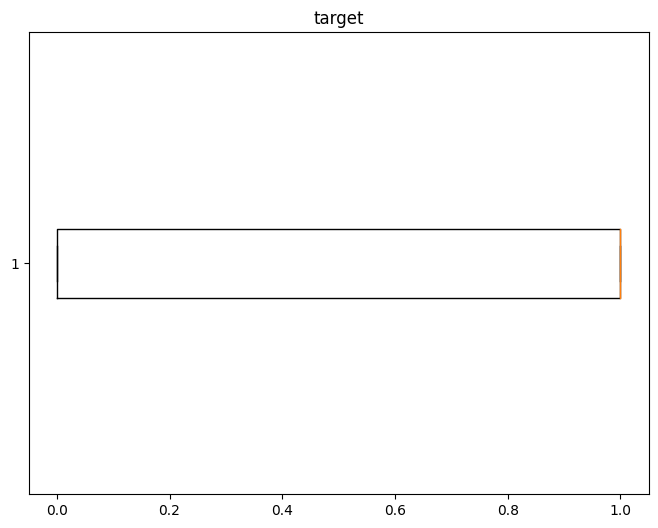

In [ ]:
for i in df.columns:
     plt.figure(figsize=(8,6))
     plt.boxplot(df[i], vert=False)
     plt.title(i)
     plt.show()


# Thanks to God, they are gone

## Now We Can Start the Training and Testing:

**Small Notice**: Why did I choose Logistic Regression for this partcular project?

I did so as this model should generate whether the person has a healthy heart or not so it is kind of binary decision it is either true or false, for that reason I chose Logisitic Regression

# First Let us split the data:

In [ ]:
x = df.drop(columns='target', axis=1)
y = df['target']


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


Let us now split the data into train and test:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)


(302, 13) (241, 13) (61, 13)


# Now Let's use Logistic Regression:

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now Let's Evaluate our model:

In [ ]:
#Evaluation of the training accuracy:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8672199170124482


In [ ]:
#Evaluation of the testing accuracy:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8524590163934426


## Let us now build a predictive system to see how our project works and try a piece of data:



In [ ]:
input_data = (70,1,2,160,269,0,1,112,1,2.9,1,1,3)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction[0]== 0:
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Well it works!
---------------


Now These are some observations on the data:

In [ ]:
#Correlation between the features and the target:
df.corr()['target']

,target
age,-0.221476
sex,-0.283609
cp,0.432080
trestbps,-0.140083
chol,-0.099932
fbs,NaN
restecg,0.134874
thalach,0.420408
exang,-0.435601
oldpeak,-0.435099


<Axes: >

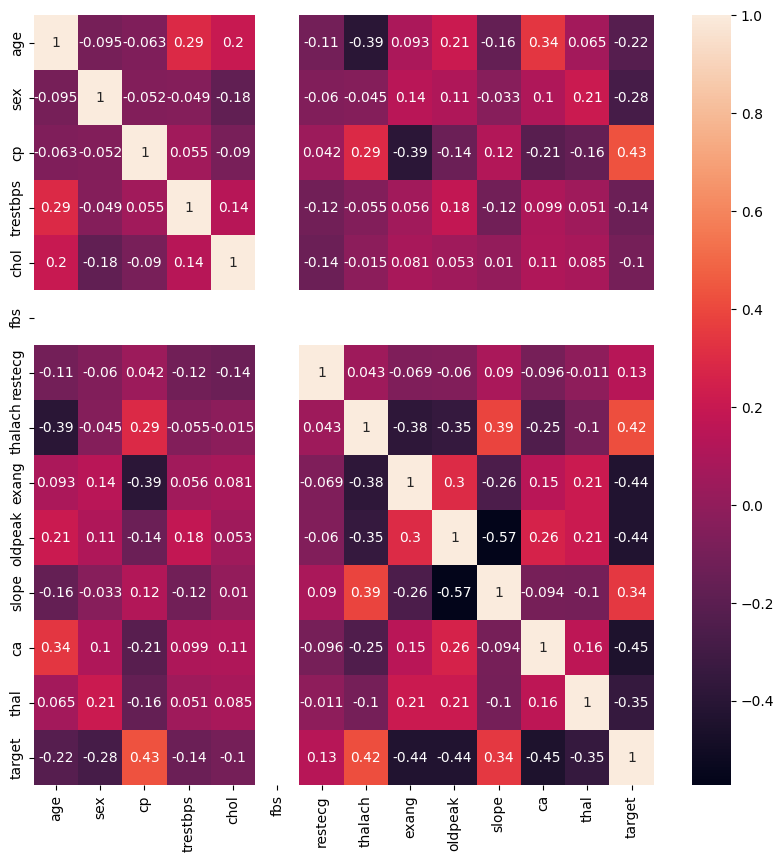

In [ ]:
#Let us show the correlation between the heart condition and all the features in the data on a heatmap:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Apparently, the condition is affected the most by Ca, while the least effective factor was Chol

In [ ]:
#Are Women more prone to heart diseases or Men?:
df['sex'].value_counts()

,count
sex,
1,206
0,96


Men were likely to have heart disease than women.

In [ ]:
#Number of younger people who prone to be diagnosed with heart disease:
count = (df['age'] <= 40).sum()
print(count)
#Their Percentage:
percentage = (count / len(df)) * 100
print(percentage)


18
5.960264900662252


The percentage of the youth is relatively small which is approximately 6%.


---










These were some insights from the data 🙂.
